In [39]:
import numpy as np
import pandas as pd

# Parameters
frequency = 50  # Frequency of the sinusoid in Hz
sampling_rate = 250  # Sampling rate in Hz
duration = 1  # Duration of the signal in seconds (changed to 5 seconds)

# Time vector
t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)

# Generate sinusoidal signal
amplitude = 1.0  # Amplitude of the sinusoid
sinusoidal_signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Create a DataFrame
data = pd.DataFrame({'Time (s)': t, 'Amplitude': sinusoidal_signal})

# Save to CSV file
data.to_csv('sinusoidal_signal.csv', index=False)

print("Sinusoidal signal data (limited to 5 seconds) has been saved to 'sinusoidal_signal.csv'")


Sinusoidal signal data (limited to 5 seconds) has been saved to 'sinusoidal_signal.csv'


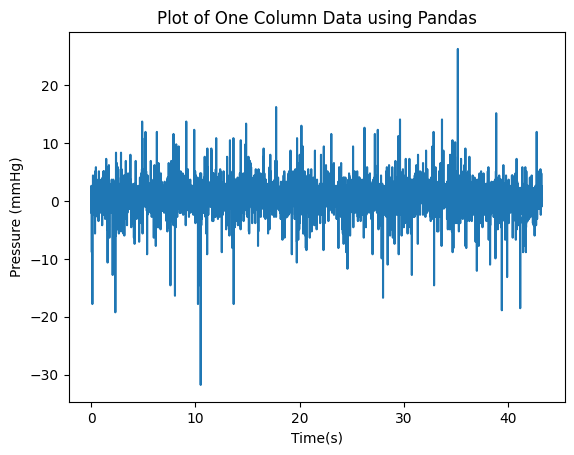

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data from the file using pandas
data = pd.read_csv('datatekanan1.txt', header=None, names=['Value'])

# Customize x-axis values by dividing the data index by 200
x_values = data.index/250

# Plot the data
plt.plot(x_values, data['Value'], linestyle='-')

# Add labels and title
plt.xlabel('Time(s)')
plt.ylabel('Pressure (mmHg)')
plt.title('Plot of One Column Data using Pandassssssssss')

# Show the plot
plt.show()


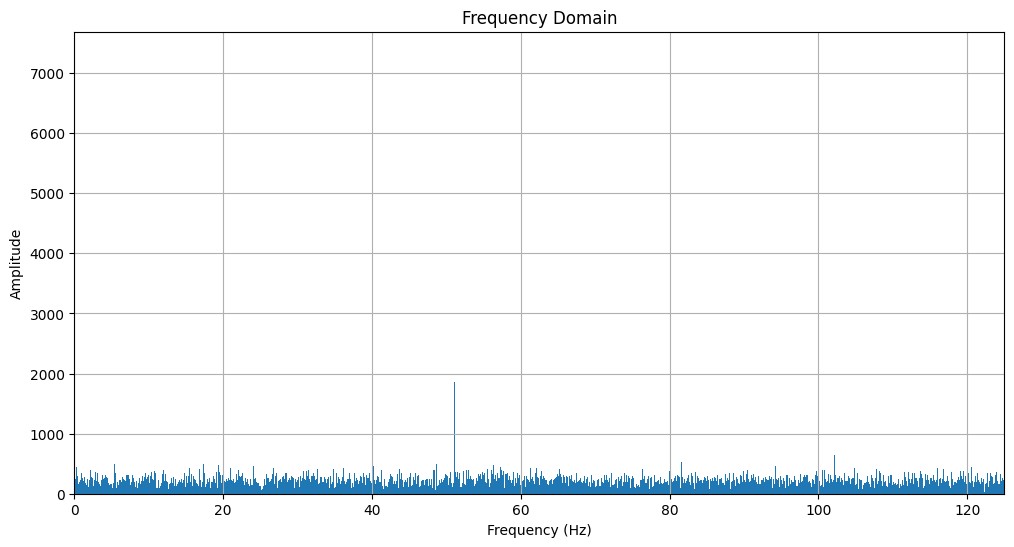

In [4]:
def fft(data):
    emg = np.asarray(data, dtype=complex)
    N = data.shape[0]
    if N <= 1:
        return data
    even = fft(data[::2])
    odd = fft(data[1::2])
    factor = np.exp(-2j * np.pi * np.arange(N) / N)
    return np.concatenate([even + factor[:N//2] * odd, even + factor[N//2:] * odd])

def fftshift(x):
    N = len(x)
    return np.concatenate((x[:N//2], x[N//2:]))

def fftfreq(n, d=1.0):
    return np.fft.fftfreq(n, d)

def fftmagnitude(data, sampling_frequency):
    N = len(data)
    padded_size = int(2**(np.ceil(np.log2(N))))
    signal_padded = np.zeros(padded_size)
    signal_padded[:N] = data
    X = fft(signal_padded)
    frequencies = abs(fftfreq(padded_size) * sampling_frequency)
    magnitude_spectrum = np.abs(fftshift(X))

    # plt.figure(figsize=((10,5)))
    # plt.stem(frequencies, magnitude_spectrum)
    # # plt.plot(freq[:len(emg)], power_spectrum[:len(emg)])
    # plt.xlabel('Frequency (Hz)')
    # plt.ylabel('Amplitude')
    # plt.title("Frequency Domain")
    # plt.xlim([0, np.max(sampling_frequency)/2])
    # plt.show()

    return frequencies, magnitude_spectrum

sampling_frequency = 250
frequencies, magnitude_spectrum = fftmagnitude(data['Value'], sampling_frequency)


plt.figure(figsize=(12, 6))  # Increase the figure size for better visibility
bar_width = frequencies[1] - frequencies[0]  # Width of each bar, calculated as the difference between consecutive frequencies
plt.bar(frequencies, magnitude_spectrum, width=bar_width * 3, align='center')  # Increase the width of the bars
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title("Frequency Domain")
plt.xlim([0, sampling_frequency/2])
plt.grid(True)
plt.show()

In [28]:
result = fft(data, 250)

KeyError: 0